<a href="https://colab.research.google.com/github/AshwiniKurady/Knapsack-FPTAS-DynamicProgramming/blob/main/0_1_Knapsack_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time

In [ ]:
# 0/1 Knapsack using BruteForce Approach
#################################################
from itertools import combinations
def brute_force_approach(n, c, w_c):
  start = time.time()
  best_cost = None
  best_comb = []
  for way in range(n):
    # to generate the combinations in all ways
    for comb in combinations(w_c, way + 1):
      weight = sum([wc[0] for wc in comb])
      cost = sum([wc[1] for wc in comb])
      if (best_cost is None or best_cost < cost) and weight <= c:
        best_cost = cost
        best_comb = [0] * n
        for wc in comb:
          best_comb[w_c.index(wc)] = 1
  end = time.time()
  return (best_cost, best_comb, {end - start})

In [ ]:
# brute_force testing

val = [60, 100, 120]
wt = [10, 20, 30]
weight_cost = [(10,60),(20,100),(30,120)]
n = len(val)
W = 50
b_c, best_combi, runTime = brute_force_approach(n, W, weight_cost)
print("By BruteForce approach", "best-cost - ", b_c, " best_combination", best_combi, "runningtime - ", runTime)

By BruteForce approach best-cost -  220  best_combination [0, 1, 1] runningtime -  {3.62396240234375e-05}


In [ ]:
def parse_line(numbers):
  value = [numbers[i + 1] for i in range(2, len(numbers), 2)]
  weight = [numbers[i] for i in range(2, len(numbers), 2)]
  weight_cost = [(numbers[i], numbers[i + 1]) for i in range(2, len(numbers), 2)]
  return weight_cost,value,weight

In [ ]:
# Brute_force approach doesnt work efficiently in the below case as it takes more running time.

numbers = 30,400,22,61,28,24,1,31 ,6 ,73, 38, 92, 5 ,168, 11, 65, 20, 4 ,46 ,54 ,3,165 ,32 ,17 ,14 ,251, 42, 146 ,35 ,45, 33 ,147 ,21 ,108, 4 ,211, 15 ,78 ,8 ,216, 40, 59, 39, 235, 2, 152, 17, 187, 9 ,9 ,44 ,3 ,16, 40 ,12 ,72 ,43 ,67 ,7 ,175, 25, 126
weight_cost,val,wt = parse_line(numbers)
n = len(val)
W = numbers[1]
best_cost, best_combination, runningtime = brute_force_approach(n, W, weight_cost)
print("By brute_force approach for large dataset :", "best-cost - ", best_cost, " best_combination", best_combination, "runningtime - ", runningtime)

In [ ]:
## 0/1 Knapsack using greedy programming
################################################## 
def greedy(c, w_c, n):
  start = time.time()
  ratios = [(ind, item[1] / float(item[0])) for ind, item in enumerate(w_c)]
  ratios = sorted(ratios, key=lambda x: x[1], reverse=True)
  best_comb = [0] * n
  best_cost = 0
  weight = 0
  for index, ratio in ratios:
    if w_c[index][0] + weight <= c:
      weight += w_c[index][0]
      best_cost += w_c[index][1]
      best_comb[index] = 1
  end = time.time()
  return (best_cost, best_comb, {end-start})

In [ ]:
# Though greedy approach gives results fast, they aren't optimal always as in the below case:
# Optimal solution is 180[1,0,1] instead of 160[1,1,0]

val = [60, 100, 120]
wt = [10, 20, 30]
weight_cost = [(10,60),(20,100),(30,120)]
n = len(val)
W = 50
best_cost, best_combi, runTime = greedy(W, weight_cost, n)
print("By Greedy approach", "best-cost - ", best_cost, " best_combination", best_combi, "runningtime - ", runTime)

By Greedy approach best-cost -  160  best_combination [1, 1, 0] runningtime -  {1.7881393432617188e-05}


In [ ]:
## 0/1 Knapsack using Dynamic Programming
#################################################
import copy

def Knapsack(n,p,s,B):
  P = max(p)
  nP = n*P
  # Initialize a 2D array
  x,y = 2,nP+1
  A = [[0 for y1 in range(y)] for x1 in range(x)]

  # Intialize 3D boolean array
  x,y,z = 2,nP+1,n
  S = [[[False for z1 in range(z)] for y1 in range(y)] for x1 in range(x)] 

  zeros = [False for eac in range(n)]

  A[0][0] = 0
  S[0][0] = [False for eac in range(n)]

  for j in range(1,nP+1):

    if(j == p[0]):
      A[0][j] = s[0]

      S[0][j] = [False for eac in range(n)]

      S[0][j][0] = True

    else:
      A[0][j] = 100000000000
      S[0][j] = None

  ### Works till here

  # p = [x-1 for x in p]
  for i in range(1,n):
    for j in range(1,nP+1):
      if(p[i]<=j):

        if(s[i] + A[0][j - p[i]] < A[0][j]):
          # print("inside first nested if",i," ",j," ",p[i])

          A[1][j] = s[i] + A[0][j - p[i]]
          S[1][j] = copy.deepcopy(S[0][j - p[i]])
          S[1][j][i] = True

        else:
          A[1][j] = A[0][j]
          if(S[0][j]== None):
            S[1][j] = None
          else:
            S[1][j] = copy.deepcopy(S[0][j])
      else:

        A[1][j] = A[0][j]
  
        if(S[0][j]==None):
          S[1][j] = None
        else:
          S[1][j] = copy.deepcopy(S[0][j])
    A[0]=copy.deepcopy(A[1])
    S[0]=copy.deepcopy(S[1])

  Z = 0
  solution = None
  for j in range(1,nP+1):
    if(A[0][j]<=B):
      Z = j
      solution = S[0][j]
  return Z, solution


In [ ]:
import time
# Test values :
n_items = 3
size = [2,1,2]
profits = [3,2,1]
B_capacity = 4
start_time = time.time()
value = Knapsack(n_items,profits,size,B_capacity)
print("Knapsack using dynamic programming: Optimal profit -", value)
print("Time taken is %s seconds ---" % (time.time() - start_time))

Knapsack using dynamic programming: Optimal profit - (5, [True, True, False])
Time taken is 0.0011568069458007812 seconds ---


In [ ]:
import time
n_items = 5
size = [1,2,5,6,7]
profits = [1340,6560,1810,2227,2834]
B_capacity = 10
start_time = time.time()
value = Knapsack(n_items,profits,size,B_capacity)
print("Knapsack using dynamic programming: Optimal profit -", value)
print("Time taken is %s seconds ---" % (time.time() - start_time))

Knapsack using dynamic programming: Optimal profit - (10734, [True, True, False, False, True])
Time taken is 0.33195042610168457 seconds ---


In [ ]:
# Fully Polynomial Time Approximation Scheme
import math
import time
def FPTAS(eps,n,p,B,s):
  optimalProfit=[]
  optimalTime = []
  for e in eps:
    P = max(p)
    # calculate scaling factor
    p_scaled = [0 for i in range(n)]
    K = (e * P) / n; 
    if K<1:
      print("Scaling factor should always be greater than 1")
      sys.exit(0)
    else:
      # print("Scaling Factor is", K)
      for i in range(n):
        p_scaled[i] = math.ceil(p[i]/K)

    start_time = time.time()
    value,solution = Knapsack(n,p_scaled,s,B)
    optimalProfit.append(value*K)
    optimalTime.append(time.time() - start_time)
  return optimalProfit,optimalTime


In [ ]:
# Read data from "filepath" and apply 0/1 Knapsack with approximation scheme
# Description of variables:
# dynProgProfit : Contains the optimal profit obtained using conventional knapsack program (for benchmarking).
# dynProgTime   : Contains the time taken to run the conventional knapsack program (for benchmarking). 
# optimalProfit : Contains the optimal profit with approximation for the particular epsilon value
# optimalTime   : Contains the time taken with approximation for the particular epsilon value

#  Need to update filepath to the google drive link with the file of dataset in order to run

import re
filepath = "./drive/My Drive/CS255 -  Design and Analysis of Algorithm/Project/sample01.txt"
# epsilon
eps = [10,5,2,1,0.5,0.2,0.1]
optimalTime=[]
optimalProfit=[]
dynProgProfit = []
dynProgTime = []
count = 0
countStore = []
with open(filepath) as f:
      for line in f:
        line = line.split()
        n =int(int(line[1])/2)
        B = int(line[2])
        lineWithoutnB = line[3:]
        res = list(map(int, lineWithoutnB[::2] + lineWithoutnB[1::2]))
        s=res[0:40]
        p=res[40:81]
        start_time = time.time()
        value,solution = Knapsack(n,p,s,B)
        dynProgProfit.append(value)
        dynProgTime.append(time.time() - start_time)
        optP,optT = FPTAS(eps,n,p,B,s)
        optimalTime.append(optT)
        optimalProfit.append(optP)
        if(count ==0):
          print("Below are the results for 20 items with Knapsack capacity of 600 and an item with Max profit is \"P","is 234\n")
          print("Dynamic programming without approximation scheme", dynProgProfit)
          print("Time taken for Dynamic programming without approximation scheme",dynProgTime)
          print("precision error",eps)
          print("Dynamic programming with approximation scheme",optimalProfit)
          print("Time taken for Dynamic programming with approximation scheme",optimalTime)
        count = count+1
        countStore.append(count)
        # if(count == 5):
        #   break

Below are the results for 20 items with Knapsack capacity of 600 and an item with Max profit is "P is 234

Dynamic programming without approximation scheme [2479]
Time taken for Dynamic programming without approximation scheme [0.810798168182373]
precision error [10, 5, 2, 1, 0.5, 0.2, 0.1]
Dynamic programming with approximation scheme [[3645.0, 3037.5, 2770.2000000000003, 2612.25, 2551.5, 2507.76, 2491.965]]
Time taken for Dynamic programming with approximation scheme [[0.010871648788452148, 0.018409252166748047, 0.0426793098449707, 0.0775153636932373, 0.16310572624206543, 0.33733177185058594, 0.6187658309936523]]


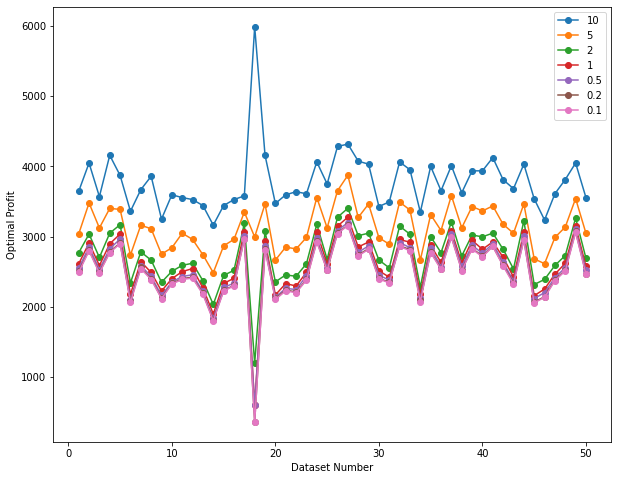

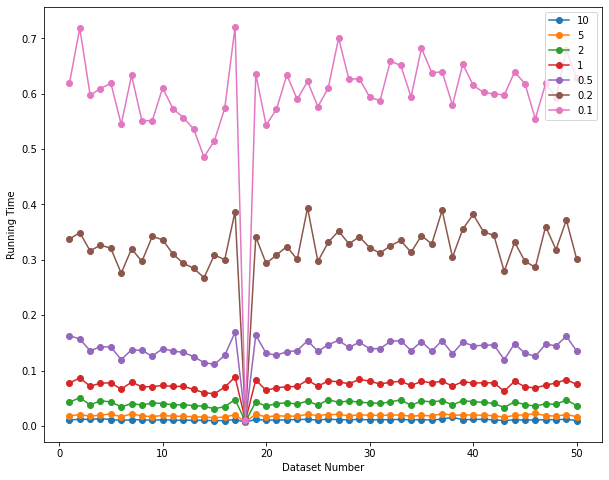

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

x = countStore

plt.figure(figsize=(10, 8))
for i in range(len(eps)):
  y = [item[i] for item in optimalProfit]
  plt.xlabel("Dataset Number")
  plt.ylabel("Optimal Profit")
  plt.plot(x, y, '-o');
  plt.legend([10,5,2,1,0.5,0.2,0.1])

plt.show()

plt.figure(figsize=(10, 8))
for i in range(len(eps)):
  plt.xlabel("Dataset Number")
  plt.ylabel("Running Time")
  y = [item[i] for item in optimalTime]
  plt.plot(x, y, '-o');
  plt.legend([10,5,2,1,0.5,0.2,0.1])

# Different colors are for different epsilon values
# X axis is different datasets
# Y axis is optimal profit for first graph and running time for second graph

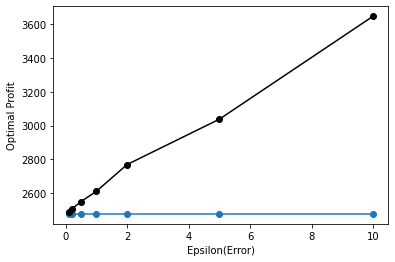

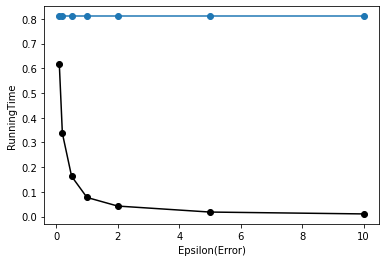

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

ij = 0
dynLim = [[dynProgProfit[x] for y in range(len(eps))] for x in range(len(dynProgProfit))]
dynTimeLim = [[dynProgTime[x] for y in range(len(eps))] for x in range(len(dynProgTime))]
y = dynLim[ij]
x = eps 

plt.xlabel("Epsilon(Error)")
plt.ylabel("Optimal Profit")
plt.plot(x, y,'-o');

y=optimalProfit[ij]
plt.plot(x, y, '-ok');
y = optimalTime[ij]
plt.show()
plt.plot(x, y, '-ok');
y = dynTimeLim[ij]
plt.xlabel("Epsilon(Error)")
plt.ylabel("RunningTime")
plt.plot(x, y, '-o');

**when error is high:**
- Running time will improve
- Result obtained is far from optimal value

**when error is low:**
- Running time will be large
- Result obtained approaches optimal value

## Rough

In [ ]:
x,y = 2,nP+1
A = [[0 for y1 in range(y)] for x1 in range(x)] 
print(A)
# x,y,z = nP,n,2
x,y,z = 2,nP+1,n
S = [[[False for z1 in range(z)] for y1 in range(y)] for x1 in range(x)] 
print(S)

[[0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0]]
[[[False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False]], [[False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False], [False, False, False]]]


In [ ]:
h,w = 4,5
n =3
A = [[5 for x in range(w)] for y in range(h)]
for i in range(1,n+1):
    A[i][0] = 0
print(A)
A[0][0]=10
print(A)

[[5, 5, 5, 5, 5], [0, 5, 5, 5, 5], [0, 5, 5, 5, 5], [0, 5, 5, 5, 5]]
[[10, 5, 5, 5, 5], [0, 5, 5, 5, 5], [0, 5, 5, 5, 5], [0, 5, 5, 5, 5]]


In [ ]:
k,h,w = 14,7,2
A = [[[False for z in range(h)] for x in range(k)] for y in range(w)] 
print(A)

[[[False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False]], [[False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False, False, False, False], [False, False, False, False

In [ ]:
n = 3
zeros = [False for eac in range(n)]
print(zeros)

[False, False, False]
